<a href="https://colab.research.google.com/github/LisiSemillero/uncertainty-2020/blob/master/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Chains

Homework: Calculate probability density using a big value of K using the formula: $\pi(k) = \pi(0)P^k$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class MarkovChain:

  def __init__(self, pi_0, P, debug):
    assert pi_0.shape[0] == P.shape[0], "pi_0 and P shape arent compatible"
    self.pi_0 = pi_0
    self.pi_i = self.pi_0
    self.P = P
    self.time = 0
    if (debug):
      print("**************************")
      print("Initalized Markov Chain: ")
      print("Time: ", self.time)
      print("Initial Density: ", self.pi_0)
      print("Transition Function: ","\n", self.P)
      print("**************************", "\n")

  def next_time(self, debug):
    self.time += 1
    self.pi_i = self.pi_i @ self.P
    if (debug):
      print("Time: ", self.time)
      print(self.pi_i, "\n")
    return self.pi_i

  def jump_time(self, k):
    self.time += k
    self.pi_i = self.pi_i @ np.linalg.matrix_power(self.P, k)
    print("Time: ", self.time)
    print(self.pi_i, "\n")
    return self.pi_i

  def stability_analysis(self, epsilon):
    print("**************************")
    print("Initializing Stability Analysis")
    print("Initial time: ", self.time)
    print("Density: ", self.pi_i)
    print("Selected Epsilon: ", epsilon, "\n")
    initial_pi_0 = self.pi_i
    tmp_pi_0 = self.pi_i
    counting_time = self.time
    diff_density = [10e8, 10e8, 10e8]
    lst_diff = []
    
    while (diff_density[0]> epsilon or diff_density[1]> epsilon or diff_density[2]> epsilon):
      new_tmp_pi_0 = tmp_pi_0 @ self.P
      diff_density = np.abs(new_tmp_pi_0 - tmp_pi_0)
      tmp_pi_0 = new_tmp_pi_0
      counting_time +=1
      lst_diff.append(np.sqrt(np.sum(np.power(diff_density, 2))))

      

    plt.plot(range(counting_time), lst_diff)
    plt.title("Delta vs Time")
    plt.xlabel("Time")
    plt.ylabel("Delta")
    print("It converges on time number:", counting_time)
    print("Steady Density:", tmp_pi_0)
    print("**************************", "\n")

  def reset_to_initial_time(self):
    self.pi_i = self.pi_0
    self.time = 0
    print("**************************")
    print("Restarted Markov Chain: ")
    print("Time: ", self.time)
    print("Density: ", self.pi_i)
    print("**************************", "\n")
    self.pi_i

  def set_pi_0(self, pi_0):
    self.pi_0 = self.pi_i = pi_0
    


**Initializing Markov Chain**

In [0]:
pi_0 = np.array([0.41, 0.31, 0.28])
P = np.array([[1, 0, 0],
              [0.2, 0.8, 0],
              [0, 0.1, 0.9]])

m = MarkovChain(pi_0, P, False)

**Going to the next step**

In [0]:
m.next_time()

Time:  1
[0.415 0.301 0.284] 



**Going to the next step 3 times**

In [0]:
m.next_time()
m.next_time()
m.next_time()

Time:  2
[0.4189 0.2959 0.2852] 

Time:  3
[0.42175 0.29269 0.28556] 

Time:  4
[0.423781 0.290551 0.285668] 



**Sometimes we will want to restart to the initial time**

In [0]:
m.reset_to_initial_time()

**************************
Restarted Markov Chain: 
Time:  0
Density:  [0.41 0.31 0.28]
************************** 



**Jumping to a time using the formula $\pi(k) = \pi(0)P^k$**

In [0]:
m.jump_time(10)

Time:  10
[0.42800649 0.28627926 0.28571425] 



**To do a stability Analysis we need to restart to initial time to specify how many steps we have to forward to get a steady density**

**************************
Restarted Markov Chain: 
Time:  0
Density:  [0.41 0.31 0.28]
************************** 

**************************
Initializing Stability Analysis
Initial time:  0
Density:  [0.41 0.31 0.28]
Selected Epsilon:  1e-59 

It converges on time number: 1257
Steady Density: [1.00000000e+00 8.51123137e-59 8.51123137e-59]
************************** 



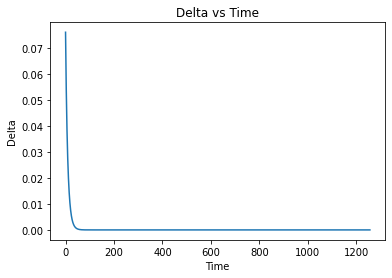

In [0]:
m.reset_to_initial_time()
m.stability_analysis(0.00000000000000000000000000000000000000000000000000000000001)

**What do you think that is going to happen if we start in another initial** $\pi(0)$**?**

**We achieved another steady state, we can see these steady points like:**


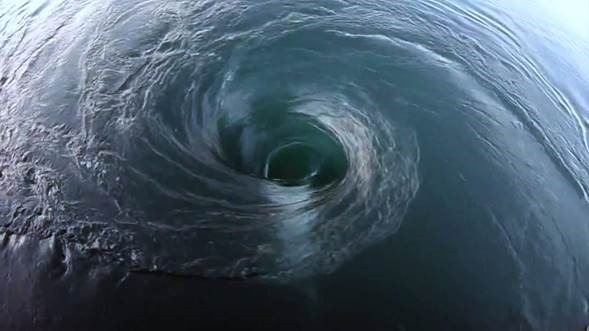

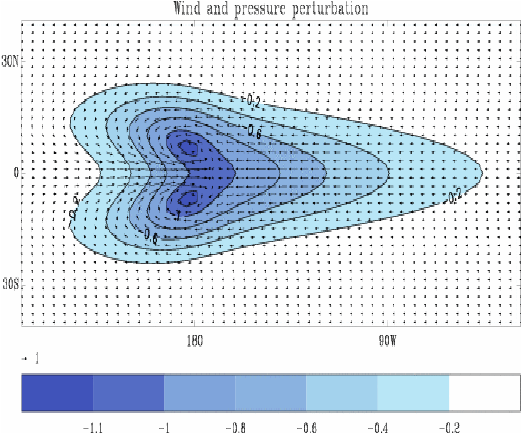



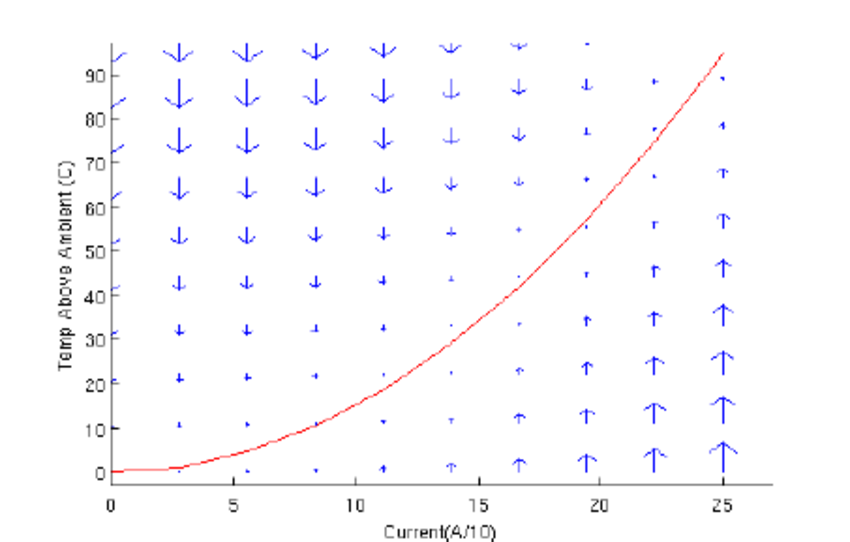


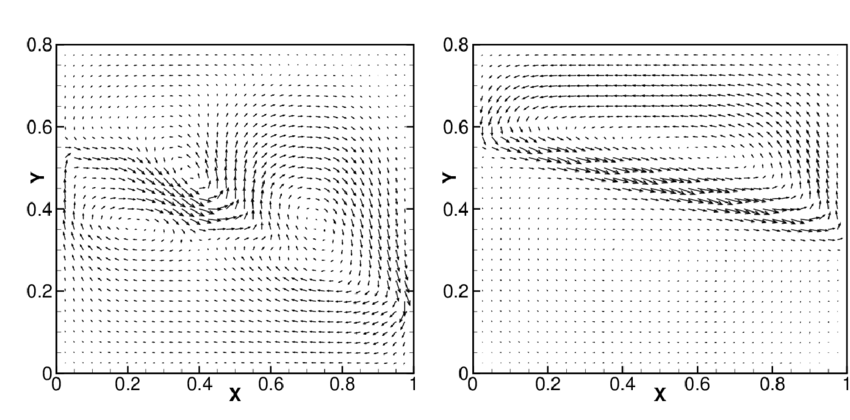

**We can see how every time in $\pi(i)$ Converge to a specific Density (Steady Density)**

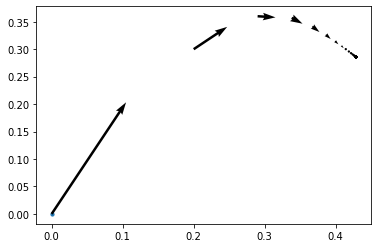

In [0]:
fig, ax = plt.subplots()

pi_0 = np.array([0.0, 0.0, 1])
m = MarkovChain(pi_0, P, False)
ax.scatter(x_pos,y_pos, s=10)

for i in range(100):
  x_pos = pi_0[0]
  y_pos = pi_0[1]
  pi_f = m.next_time(False)
  x_direct = pi_f[0] - x_pos
  y_direct = pi_f[1] - y_pos
  ax.quiver(x_pos, y_pos, x_direct, y_direct, scale=0.9)
  pi_0 = pi_f

plt.show()

**Plotting Vector Field produced by $P$**

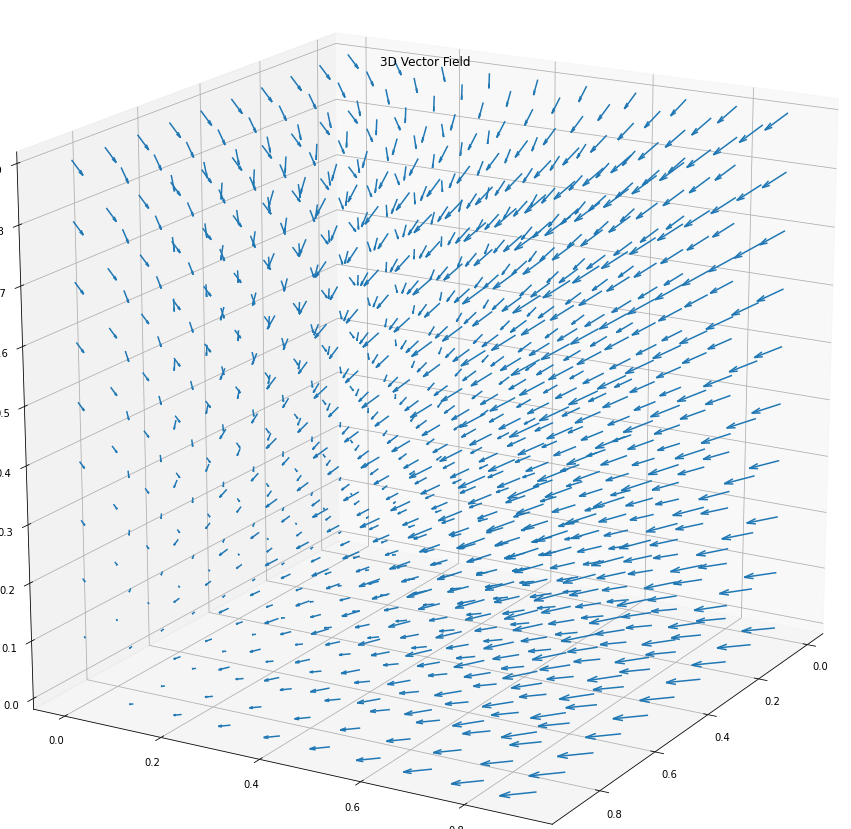

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

P = np.array([[1, 0, 0],
              [0.2, 0.8, 0],
              [0, 0.1, 0.9]])

fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(0, 1, 0.1),
                      np.arange(0, 1, 0.1),
                      np.arange(0, 1, 0.1))

u = np.zeros(x.shape)
v = np.zeros(x.shape)
w = np.zeros(x.shape)
colors = np.zeros(x.shape)

for i in range(10):
  for j in range(10):
    for k in range(10):
      m = MarkovChain(np.array([x[i][j][k], y[i][j][k], z[i][j][k]]), P, False)
      pi_f = m.next_time(False)
      # Make the direction data for the arrows
      u[i][j][k] = pi_f[0] - x[i][j][k]
      v[i][j][k] = pi_f[1] - y[i][j][k]
      w[i][j][k] = pi_f[2] - z[i][j][k]

# mag = np.sqrt(u*u+v*v+w*w)
# u/= mag
colormap = cm.inferno
ax.quiver(x, y, z, u, v, w, length=0.25)

ax.set_title('3D Vector Field')             # title
ax.view_init(elev=18, azim=30)              # camera elevation and angle
ax.dist=8                                   # camera distance
plt.show()

### Walking Points on an Area 


In [5]:
from IPython.display import HTML
from matplotlib import animation
from matplotlib.colors import ListedColormap


fig = plt.figure()
ax = plt.axes(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

pi_0 = np.array([0.4, 0.3, 0.3])

P = np.array([[0.8, 0.1, 0.1],
              [0.1, 0.7, 0.2],
              [0.2, 0.2, 0.6]])

m = MarkovChain(pi_0, P, False)

num_iterations = 1000

space_x = np.array([0, 1])
space_y = np.array([0, 1])

line_x = space_x[1] / pi_0.shape[0]

# Plotting Figure and Areas
for i in range(pi_0.shape[0] + 1):
  plt.plot([line_x * i, line_x* i], [0, 1], 'b--', label=' X Area Boundary')

plt.plot([0, 1], [0, 0], 'b--', label='Y Area Boundary')
plt.plot([1, 0], [1, 1], 'b--', label='Y Area Boundary')

data_points = []
labels = []
colors = ['green','blue','purple']

for i in range(num_iterations):
  acum_density = m.next_time(False).copy()
  acum = 0
  for index, j in enumerate(acum_density):
    acum += j
    acum_density[index] = acum
  # print(acum_density)
  rand_num = np.random.uniform(0, 1)
  for index, j in enumerate(acum_density):
    if (rand_num < j):
      labels.append(index)
      random_point = np.array([np.random.uniform(index * line_x, (index+1) * line_x), np.random.uniform()])
      data_points.append(random_point)
      break

data_points = np.array(data_points)
print(data_points.shape, len(labels))
plt.scatter(data_points[:,0], data_points[:,1], c=labels, cmap=ListedColormap(colors))



<IPython.core.display.Javascript object>

(1000, 2) 1000


In [8]:
%matplotlib notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

space_x = np.array([0, 1])
space_y = np.array([0, 1])

line_x = space_x[1] / pi_0.shape[0]
for ix, i in enumerate(labels):
  if i==0:
    labels[ix]= "g"
  elif i==1:
    labels[ix]= "r"
  else:
    labels[ix]= "b"
# labels = np.where(labels==0, "green", np.where(labels==1, "blue", "purple"))
# Plotting Figure and Areas
for i in range(pi_0.shape[0] + 1):
  ax.plot([line_x * i, line_x* i], [0, 1], 'b--', label=' X Area Boundary')

ax.plot([0, 1], [0, 0], 'b--', label='Y Area Boundary')
ax.plot([1, 0], [1, 1], 'b--', label='Y Area Boundary')


scat, = plt.plot([], [], 'o')
# print(type(labels), labels.shape)
def animate(i):
    scat.set_data(data_points[:i+1,0], data_points[:i+1,1])
    # print(labels[:i+1])
    scat.set_color(labels[:i+1][0])
    # print(type(scat))
    return scat

plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig, animate, 100, blit = True)
plt.show()

HTML(line_ani.to_jshtml())   

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

In [0]:
]